In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
from scipy import stats
from sklearn.impute import KNNImputer as KNN

In [2]:
# calling up files
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.shape


(614, 13)

In [4]:
test.shape

(367, 12)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


In [10]:
train=train.dropna()

In [11]:
test=test.dropna()

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,Y


In [13]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


# Distribution of Target variable.

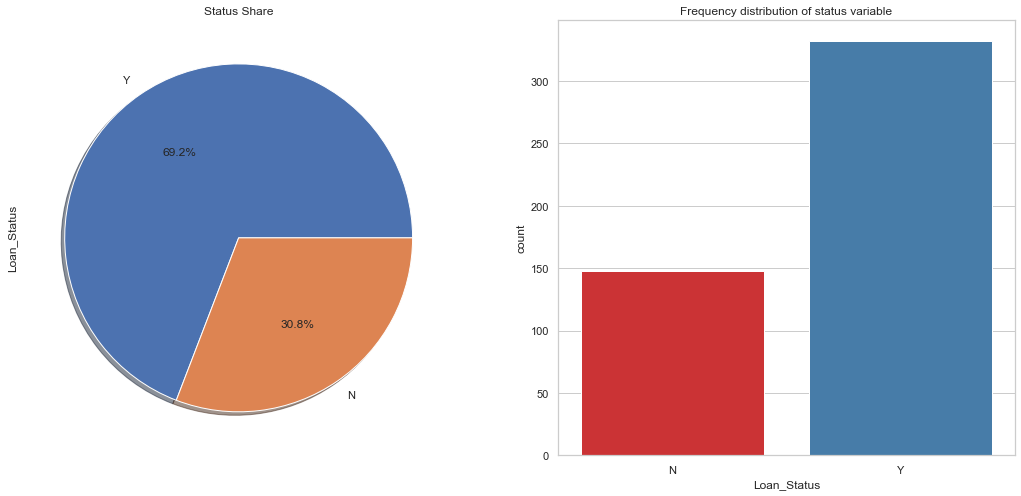

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0] = train['Loan_Status'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status Share')
#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Loan_Status", data=train, palette="Set1")
ax[1].set_title("Frequency distribution of status variable")
plt.show()

# Distribution of Target variable with respect to Education.

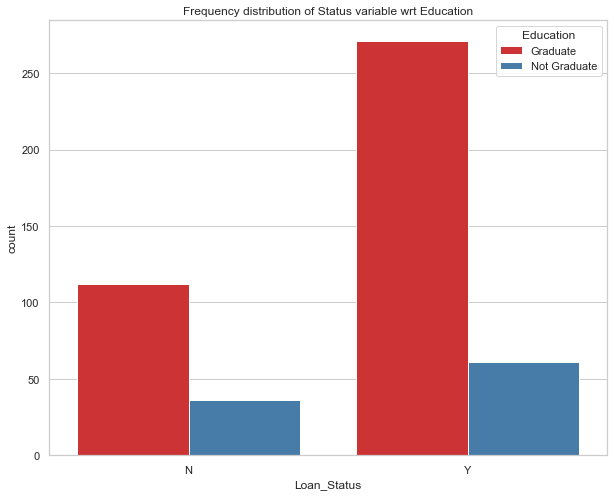

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='Loan_Status', hue="Education", data=train, palette="Set1")
ax.set_title("Frequency distribution of Status variable wrt Education")
plt.show()

# Distribution of Target variable with respect to Gender.

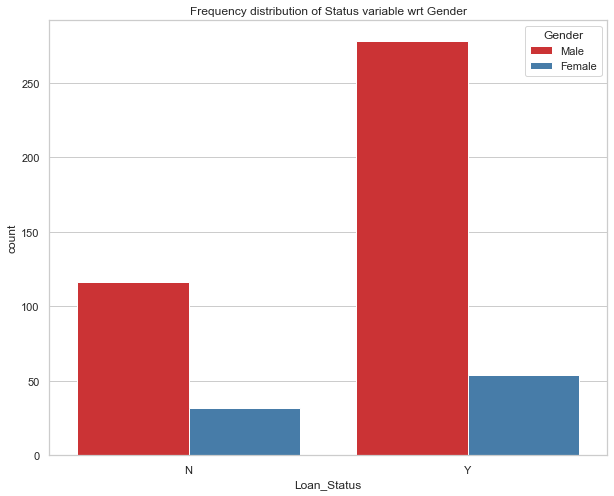

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='Loan_Status', hue="Gender", data=train, palette="Set1")
ax.set_title("Frequency distribution of Status variable wrt Gender")
plt.show()

# Distribution of Target variable with respect to Married.

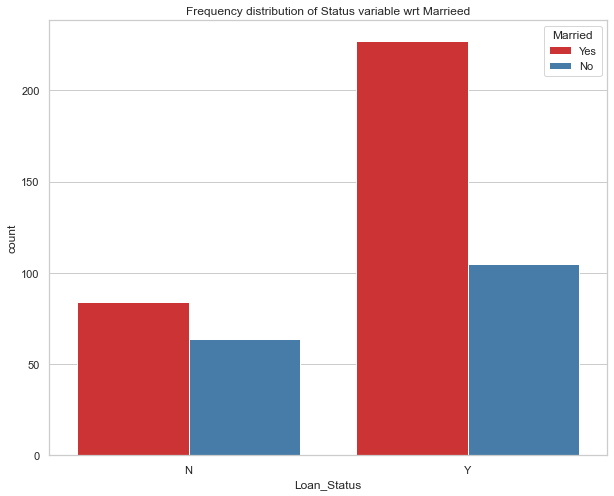

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='Loan_Status', hue="Married", data=train, palette="Set1")
ax.set_title("Frequency distribution of Status variable wrt Marrieed")
plt.show()

# Distribution of Target variable with respect self employed

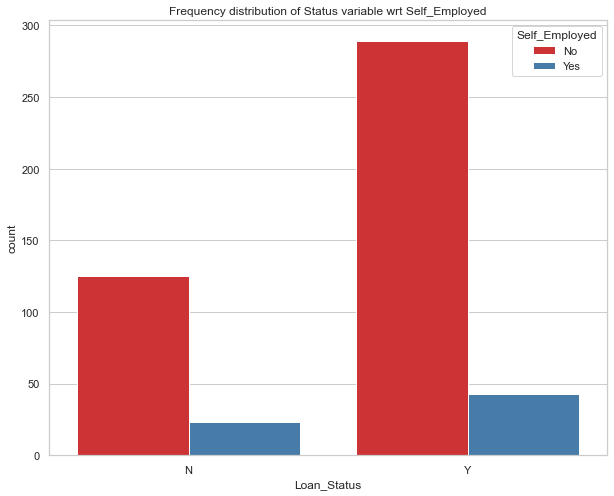

In [18]:

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='Loan_Status', hue="Self_Employed", data=train, palette="Set1")
ax.set_title("Frequency distribution of Status variable wrt Self_Employed")
plt.show()

In [19]:
# Getting data to ready for the model.

train= train.drop(['Loan_ID'], axis=1)
test= test.drop(['Loan_ID'], axis=1)

In [20]:
numerical = [var for var in train.columns if train[var].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 2 numerical variables

The numerical variables are :

 ['ApplicantIncome', 'CoapplicantIncome']


In [21]:
numerical = [var for var in test.columns if test[var].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 2 numerical variables

The numerical variables are :

 ['ApplicantIncome', 'CoapplicantIncome']


In [22]:
float = [var for var in train.columns if train[var].dtype=='float']

print('There are {} float variables\n'.format(len(float)))

print('The numerical variables are :\n\n', float)

There are 3 float variables

The numerical variables are :

 ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [23]:
float = [var for var in test.columns if test[var].dtype=='float']

print('There are {} float variables\n'.format(len(float)))

print('The numerical variables are :\n\n', float)

There are 3 float variables

The numerical variables are :

 ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [24]:
categorical = [var for var in train.columns if train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [25]:
categorical = [var for var in test.columns if test[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 6 categorical variables

The categorical variables are :

 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [26]:
train[numerical].describe()

,ApplicantIncome,CoapplicantIncome
count,480.000000,480.000000
mean,5364.231250,1581.091667
std,5668.251251,2617.692797
min,150.000000,0.000000
25%,2898.750000,0.000000
50%,3859.000000,1084.500000
75%,5852.500000,2253.250000
max,81000.000000,33837.000000


In [27]:
test[numerical].describe()

,ApplicantIncome,CoapplicantIncome
count,289.000000,289.000000
mean,4637.352941,1528.262976
std,4790.683934,2377.599209
min,0.000000,0.000000
25%,2875.000000,0.000000
50%,3833.000000,879.000000
75%,5000.000000,2400.000000
max,72529.000000,24000.000000


In [28]:
train[float].describe()

,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000
mean,144.735417,342.050000,0.854167
std,80.508164,65.212401,0.353307
min,9.000000,36.000000,0.000000
25%,100.000000,360.000000,1.000000
50%,128.000000,360.000000,1.000000
75%,170.000000,360.000000,1.000000
max,600.000000,480.000000,1.000000


In [29]:
test[float].describe()

,LoanAmount,Loan_Amount_Term,Credit_History
count,289.000000,289.000000,289.000000
mean,136.792388,342.671280,0.840830
std,59.699582,65.655503,0.366469
min,28.000000,6.000000,0.000000
25%,102.000000,360.000000,1.000000
50%,126.000000,360.000000,1.000000
75%,158.000000,360.000000,1.000000
max,460.000000,480.000000,1.000000


In [30]:
a= train.drop(['Loan_Status'], axis=1)
b =train['Loan_Status']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b,test_size = 0.1, random_state = 0)


In [32]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
347,Male,Yes,2,Not Graduate,No,3083,2168,126.0,360.0,1.0,Urban
246,Male,Yes,2,Graduate,No,9703,0,112.0,360.0,1.0,Urban
249,Male,Yes,0,Graduate,No,1809,1868,90.0,360.0,1.0,Urban
262,Female,No,1,Graduate,No,3481,0,155.0,36.0,1.0,Semiurban
407,Female,No,0,Not Graduate,No,2213,0,66.0,360.0,1.0,Rural


In [33]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,Male,Yes,0,Not Graduate,No,4887,0,133.0,360.0,1.0,Rural
161,Male,Yes,0,Graduate,No,7933,0,275.0,360.0,1.0,Urban
182,Male,Yes,0,Graduate,No,4600,0,73.0,180.0,1.0,Semiurban
340,Male,Yes,3+,Not Graduate,No,2647,1587,173.0,360.0,1.0,Rural
216,Male,Yes,0,Graduate,No,150,1800,135.0,360.0,1.0,Rural


In [34]:
y_train.head()

347    Y
246    Y
249    Y
262    N
407    Y
Name: Loan_Status, dtype: object

In [35]:
y_test.head()

18     N
161    N
182    Y
340    N
216    N
Name: Loan_Status, dtype: object

In [36]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((432, 11), (48, 11))

In [37]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [38]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [39]:
# preview categorical variables in X_train

X_train[categorical].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
347,Male,Yes,2,Not Graduate,No,Urban
246,Male,Yes,2,Graduate,No,Urban
249,Male,Yes,0,Graduate,No,Urban
262,Female,No,1,Graduate,No,Semiurban
407,Female,No,0,Not Graduate,No,Rural


In [41]:

import category_encoders as ce

In [42]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                                 'Property_Area'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [43]:
X_train.head()

,Gender_1,Gender_2,Married_1,Married_2,Dependents_1,Dependents_2,Dependents_3,Dependents_4,Education_1,Education_2,Self_Employed_1,Self_Employed_2,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_1,Property_Area_2,Property_Area_3
347,1,0,1,0,1,0,0,0,1,0,1,0,3083,2168,126.0,360.0,1.0,1,0,0
246,1,0,1,0,1,0,0,0,0,1,1,0,9703,0,112.0,360.0,1.0,1,0,0
249,1,0,1,0,0,1,0,0,0,1,1,0,1809,1868,90.0,360.0,1.0,1,0,0
262,0,1,0,1,0,0,1,0,0,1,1,0,3481,0,155.0,36.0,1.0,0,1,0
407,0,1,0,1,0,1,0,0,1,0,1,0,2213,0,66.0,360.0,1.0,0,0,1


In [44]:
X_train.shape

(432, 20)

In [45]:
X_test.head()

,Gender_1,Gender_2,Married_1,Married_2,Dependents_1,Dependents_2,Dependents_3,Dependents_4,Education_1,Education_2,Self_Employed_1,Self_Employed_2,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_1,Property_Area_2,Property_Area_3
18,1,0,1,0,0,1,0,0,1,0,1,0,4887,0,133.0,360.0,1.0,0,0,1
161,1,0,1,0,0,1,0,0,0,1,1,0,7933,0,275.0,360.0,1.0,1,0,0
182,1,0,1,0,0,1,0,0,0,1,1,0,4600,0,73.0,180.0,1.0,0,1,0
340,1,0,1,0,0,0,0,1,1,0,1,0,2647,1587,173.0,360.0,1.0,0,0,1
216,1,0,1,0,0,1,0,0,0,1,1,0,150,1800,135.0,360.0,1.0,0,0,1


In [46]:
X_test.shape

(48, 20)

In [47]:
cols = X_train.columns
## ScALING MAKES ALL THE DATA POINTS IN SAME SCALE< SO THAT MODEL CAN BE TRAINED>

In [48]:
cols

Index(['Gender_1', 'Gender_2', 'Married_1', 'Married_2', 'Dependents_1',
       'Dependents_2', 'Dependents_3', 'Dependents_4', 'Education_1',
       'Education_2', 'Self_Employed_1', 'Self_Employed_2', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_1', 'Property_Area_2', 'Property_Area_3'],
      dtype='object')

In [49]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [50]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [51]:
X_train.head()

,Gender_1,Gender_2,Married_1,Married_2,Dependents_1,Dependents_2,Dependents_3,Dependents_4,Education_1,Education_2,Self_Employed_1,Self_Employed_2,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_1,Property_Area_2,Property_Area_3
0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,-1.0,0.0,0.0,-0.261647,0.509164,-0.028571,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.891373,-0.454071,-0.228571,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.675990,0.375875,-0.542857,0.0,0.0,1.0,0.0,0.0
3,-1.0,1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.132206,-0.454071,0.385714,-324.0,0.0,0.0,1.0,0.0
4,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-0.544597,-0.454071,-0.885714,0.0,0.0,0.0,0.0,1.0


In [52]:
X_test.head()

,Gender_1,Gender_2,Married_1,Married_2,Dependents_1,Dependents_2,Dependents_3,Dependents_4,Education_1,Education_2,Self_Employed_1,Self_Employed_2,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_1,Property_Area_2,Property_Area_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.325067,-0.454071,0.071429,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.315717,-0.454071,2.100000,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231726,-0.454071,-0.785714,-180.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0,-0.403447,0.251027,0.642857,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.215546,0.345663,0.100000,0.0,0.0,0.0,0.0,1.0


In [53]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7500


In [55]:
# view the feature scores

####IMPORTANT FEATURE PERCENTAGE####

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Credit_History       0.236303
ApplicantIncome      0.189813
LoanAmount           0.185737
CoapplicantIncome    0.103042
Loan_Amount_Term     0.053759
Property_Area_2      0.025221
Property_Area_3      0.018900
Married_1            0.017592
Dependents_3         0.016930
Married_2            0.016874
Dependents_2         0.016174
Education_1          0.015378
Property_Area_1      0.014684
Gender_1             0.013843
Dependents_1         0.013308
Self_Employed_1      0.013175
Gender_2             0.013053
Education_2          0.013023
Self_Employed_2      0.011810
Dependents_4         0.011379
dtype: float64

In [ ]:
### So here are the important variables and most significant in cronological order that helps in predicting the outcome.